# **Author: Reza Dehkordi**

# **Date: 03/30/2021**


# **Overview:**
>As a Data Sceientist for a global enviromental agency. I have been tasked with underestanding climate change patterns. I will be using the sea-ice dataset retrieved from the National Snow and Ice Data Center. The goal of this analysis is to identify changes of the Artic and Antarctic ice area thickness on a month to month basis. Using two univariate time series models I can provide insight into the historical trends over the past decade as well as provide insight to forecasting what trends will occur in the future. If seasonality or overall decrease in area of thickness is wittnessed, it could be benefitial in support of political actions to combat global warming. 


# **Data:**
>Data has been obtained from NSIDC(National Snow and Ice Data Center). It provideds a quick look at the artic and antartic wide changes in sea ice from November 1978 to present. 

>Source: ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/north/monthly/data/

>Description: https://nsidc.org/data/g02135

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
%matplotlib inline
from matplotlib import pyplot as plt

import warnings 
warnings.filterwarnings("ignore")


#Loading data into dataframe to be used,combine all 12 csv files into one dataframe so we have proper dataset with all 12 months
df = pd.concat(map(pd.read_csv, ['N_01_extent_v3.0.csv','N_02_extent_v3.0.csv','N_03_extent_v3.0.csv','N_04_extent_v3.0.csv',
                                 'N_05_extent_v3.0.csv','N_06_extent_v3.0.csv','N_07_extent_v3.0.csv','N_08_extent_v3.0.csv',
                                 'N_09_extent_v3.0.csv','N_10_extent_v3.0.csv','N_11_extent_v3.0.csv' ,'N_12_extent_v3.0.csv']))
#remove the spaces that appear in column headings
df.columns = df.columns.str.replace(' ', '') 
#dropping bad rows from dataset
df = df[df['area'] != -9999.00]
#dropping columns we don't need
df=df.drop(['data-type','region','extent'], axis=1)
#create a unique time column to sort on
df["time"] = df["year"].apply(str) + "-" + df["mo"].apply(str).str.zfill(2)
#drop the old columns we don't need now
df=df.drop(['year', 'mo'], axis=1)
#make sure our new unique column is the index which is important for time series data (needs to be in order!)
df = df.set_index('time')
#sort it!
df = df.sort_values(by=['time'])
#make sure it's in order
df.tail(50)


,area
time,
2017-01,11.37
2017-02,12.32
2017-03,12.61
2017-04,12.26
2017-05,11.01
2017-06,8.63
2017-07,5.65
2017-08,3.64
2017-09,3.35


# **EDA:**

In [2]:
df.shape

(505, 1)

In [3]:
df.isnull().values.all()

False

In [4]:
df.describe()

,area
count,505.000000
mean,9.294851
std,3.236634
min,2.410000
25%,6.290000
50%,9.950000
75%,12.300000
max,13.900000


<AxesSubplot:xlabel='time'>

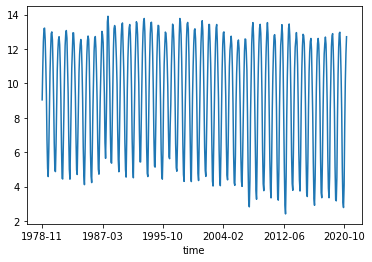

In [5]:
%matplotlib inline
df['area'].plot()

### **ACF and PACF**

In [6]:
traindata, testdata = df.iloc[:371], df.iloc[371:]
print(traindata.tail())
testdata.head()


          area
time          
2009-08   4.16
2009-09   3.76
2009-10   5.24
2009-11   8.36
2009-12  10.59


,area
time,
2010-01,12.04
2010-02,12.96
2010-03,13.53
2010-04,12.85
2010-05,10.88


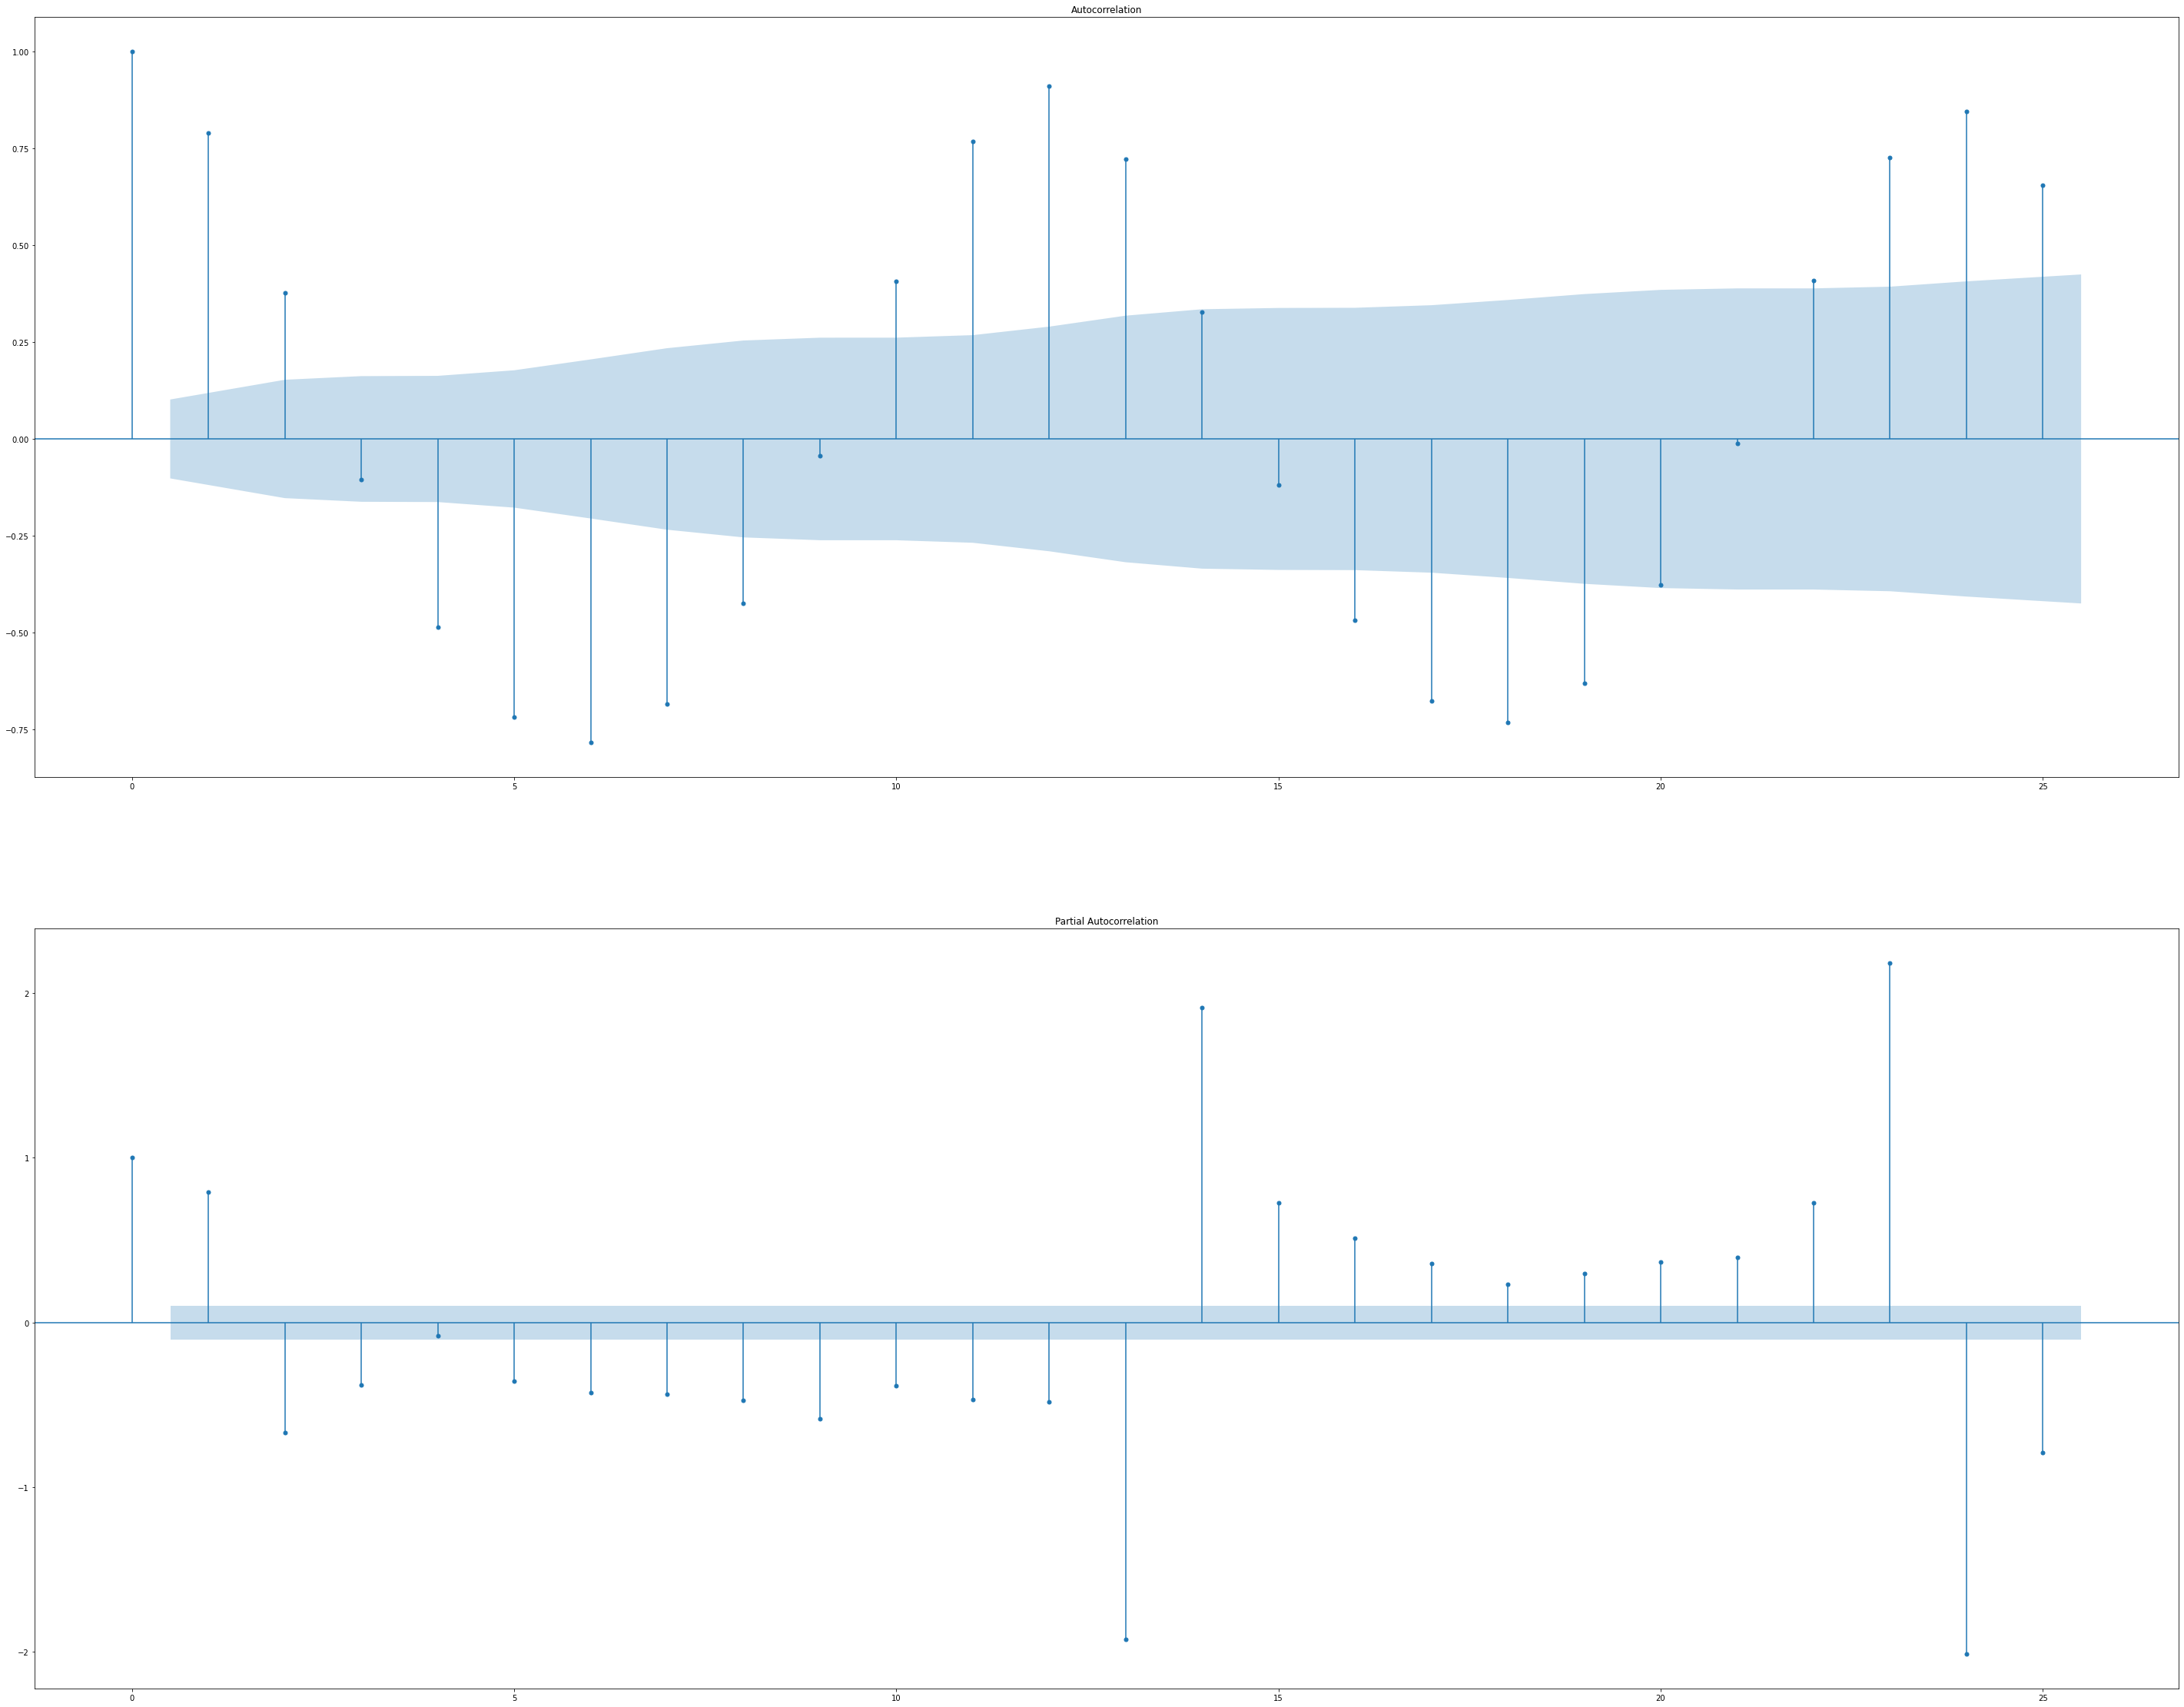

In [7]:
fig = plt.figure(figsize=(50,40))
ax1 = fig.add_subplot(211)
fig = sma.graphics.tsa.plot_acf(traindata['area'].diff().dropna(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sma.graphics.tsa.plot_pacf(traindata['area'].diff().dropna(), lags=25, ax=ax2)
plt.show()


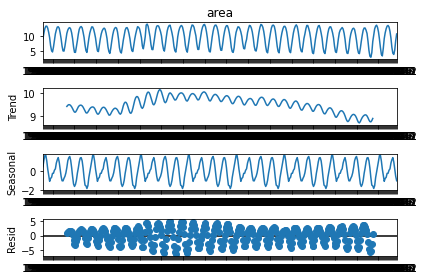

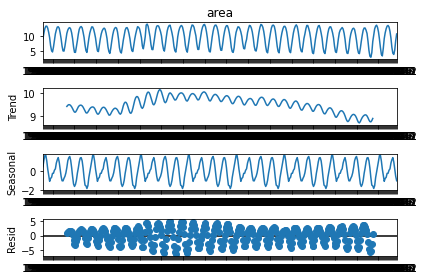

In [8]:
time_chart = sm.tsa.seasonal.seasonal_decompose(traindata.area, model='additive', freq=50)
time_chart.plot()

From the above time chart, both seasionality and a downward trend can be witnessed. 

# **Models:**
>The two time series models that will be inspected on the sea-ice dataset are: 

> Auto Regressive Integrated Moving Average(ARIMA)

> Holt Winter's Method


### ** ARIMA**

In [23]:
arima_model = sm.tsa.arima_model.ARIMA(traindata['area'], order=(3,0,16))
arima_model_fit = arima_model.fit()

print(arima_model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                   area   No. Observations:                  371
Model:                    ARMA(3, 16)   Log Likelihood                -201.522
Method:                       css-mle   S.D. of innovations              0.408
Date:                Tue, 30 Mar 2021   AIC                            445.045
Time:                        22:00:57   BIC                            527.285
Sample:                             0   HQIC                           477.708
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.4858      0.118     80.082      0.000       9.254       9.718
ar.L1.area      2.6311      0.031     84.205      0.000       2.570       2.692
ar.L2.area     -2.5554      0.054    -47.126    

> From the PACF plot it was dificult to depict a value for the q prameter of ARIMA, there were seamingly many points that were beyond the critical range. and when a large number was entered for q the ARIMA model produced an error. I chose to go with the number of points which were far exceeding the critical range. Also although there was seasionality detected in the time chart the ARIMA model would not run with any value of the d prameter besides 0. From the residual plot we can notice a relitively constant output with no visible downward or upward trend, meaning that the prameters are solid and the AIC and BIC values are minimized through experimentation with the prameters.

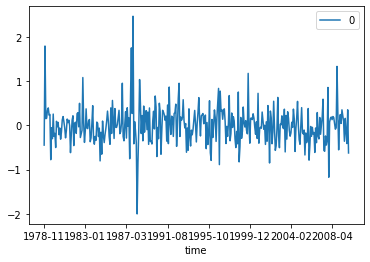

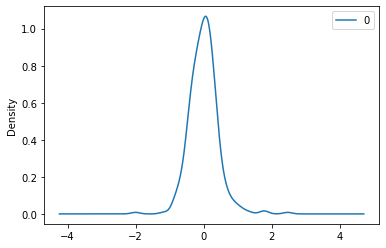

                0
count  371.000000
mean     0.001944
std      0.422363
min     -2.002192
25%     -0.249825
50%     -0.002372
75%      0.216663
max      2.469065


In [24]:
# line plot of residuals
residuals = pd.DataFrame(arima_model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())


In [26]:
s = len(traindata)
e = len(traindata) + len(testdata)-1
arima_pred = arima_model_fit.predict(start=s, end=e)
arima_pred.index = df.index[s:e+1]

<AxesSubplot:xlabel='time'>

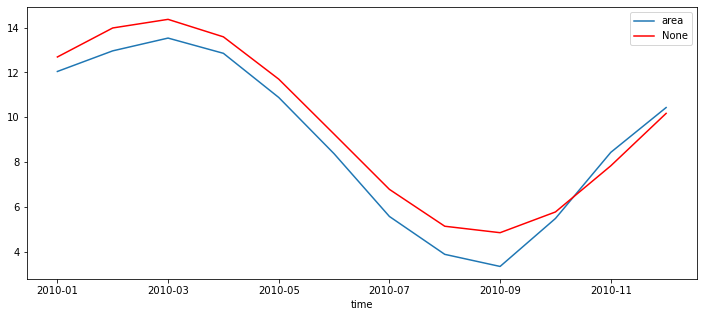

In [25]:
#arima_pred.plot(legend=True)
#testdata['area'].plot(legend=True)

plot_train = testdata.head(12)
plot_pred = arima_pred.head(12)

plot_train['area'].plot(legend=True)
plot_pred.plot(figsize=(12,5),legend=True, color='red')


> The comparasion of the test data and the ARIMA prediction for the same time period shows that both plots follow the same trend but there are some significant differences from the test data and the model prediction.

### **Holt Winter's Method**

<AxesSubplot:xlabel='time'>

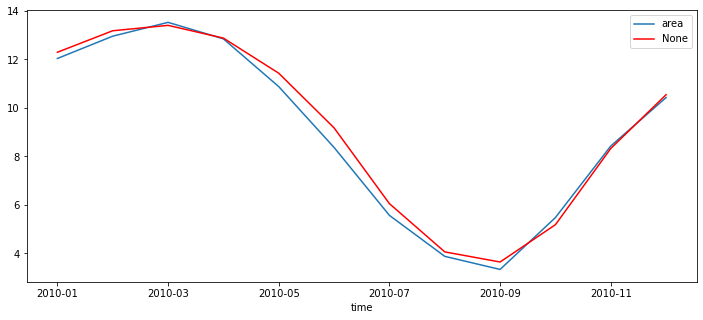

In [27]:
hw = sm.tsa.holtwinters.ExponentialSmoothing(df.area, seasonal_periods=12, trend='add', 
                                             seasonal='add', initialization_method='estimated')
hw_model = hw.fit()

hw_pred = hw_model.predict(start=s, end=e)

plot_train = testdata.head(12)
plot_pred = hw_pred.head(12)

plot_train['area'].plot(legend=True)
plot_pred.plot(figsize=(12,5),legend=True, color='red')

> The comparasion of the test data and the Holt Winter's prediction for the same time period shows that both plots follow the same trend but there are some slight differences from the test data and the model prediction. Compared to the ARIMA prediction the Holt Winter's model has done much better. 

# **Conclusion:**
> From the experience dealing with the time series data, it can be concluded that the modeling process comes with some difficulties. Depending on the data and the trends present, at times it can be difficult to predict the correct prameters for models such as ARIMA or SARIMA. Experimentation with the different prameters can be helpful with finding the best prameters. Working with the Holt Winter's method seems to be the simpler of the options which provides an easy to evaluate visual. From the experimentation on the sea-ice data, there is evidence for seasonality, but a trend and the prediction seem to indicate an overall decrease in the ice levels as well as an increase in the fluctiotion of the ice area from season to season.

> From the actual data graphed early in the notebook 2 patterns can be seen slight: (1) A slight down ward pattern from 1978 to present. (2) it can be seen that the general length of the graph fram the highs to the lows of the areas of ice increased, Both the general decrease in sea ice and an increase in fluctuation and extreme highs and lows can be effects of global warming. Due to the potential significance of the outcomes of global warming and the patterns noticed on the models, I beleive actions should be taken to slow down the inevitable progress of global warming. 